In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import datasets
import_base_path = "/Users/jackkim4/Documents/Compliace:Talent/MSAAI/AAI501"
model_1_path = f"{import_base_path}/model1_data_AAPL.csv"
model_2_path = f"{import_base_path}/model2_data_all_companies.csv"
model_1_data = pd.read_csv(model_1_path)
model_2_data = pd.read_csv(model_2_path)

# Convert 'date' to datetime format
model_1_data['date'] = pd.to_datetime(model_1_data['date'])
model_2_data['date'] = pd.to_datetime(model_2_data['date'])

# Summary Statistics
print("AAPL Summary:\n", model_1_data[['open', 'close', 'volume']].describe())
print("\nIT Companies Summary:\n", model_2_data[['open', 'close', 'volume']].describe())

AAPL Summary:
               open        close        volume
count  1762.000000  1762.000000  1.762000e+03
mean     79.427744    79.402683  9.422578e+07
std      28.339001    28.330794  6.020519e+07
min      27.481428    27.435715  1.147590e+07
25%      55.401787    55.450000  4.917478e+07
50%      78.742146    78.435711  8.050385e+07
75%     102.979998   103.092503  1.210816e+08
max     134.460007   133.000000  4.702495e+08

IT Companies Summary:
                open         close        volume
count  17620.000000  17620.000000  1.762000e+04
mean      50.225910     50.249194  3.127829e+07
std       46.363519     46.385154  3.695582e+07
min        5.286104      5.317893  5.982000e+05
25%       22.540001     22.549999  7.110750e+06
50%       31.969999     31.995000  2.090200e+07
75%       55.652501     55.685000  4.065502e+07
max      215.380005    215.800003  5.600402e+08


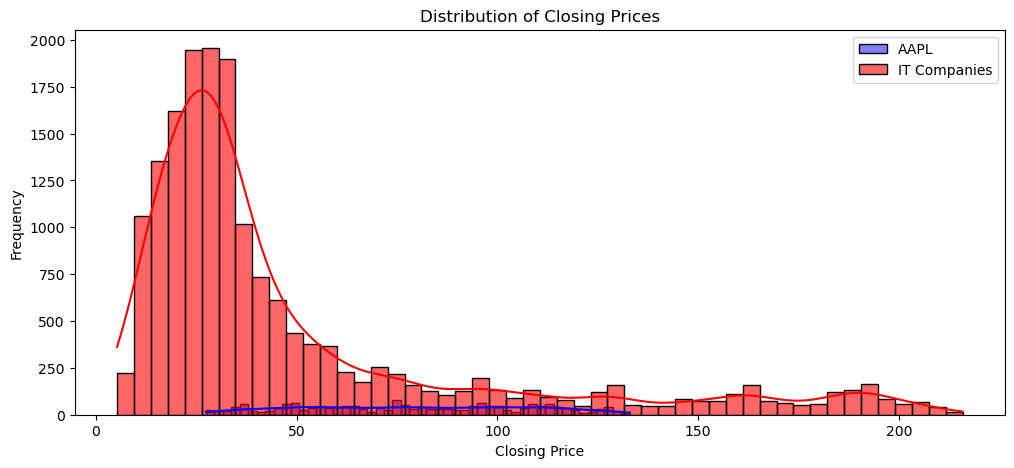

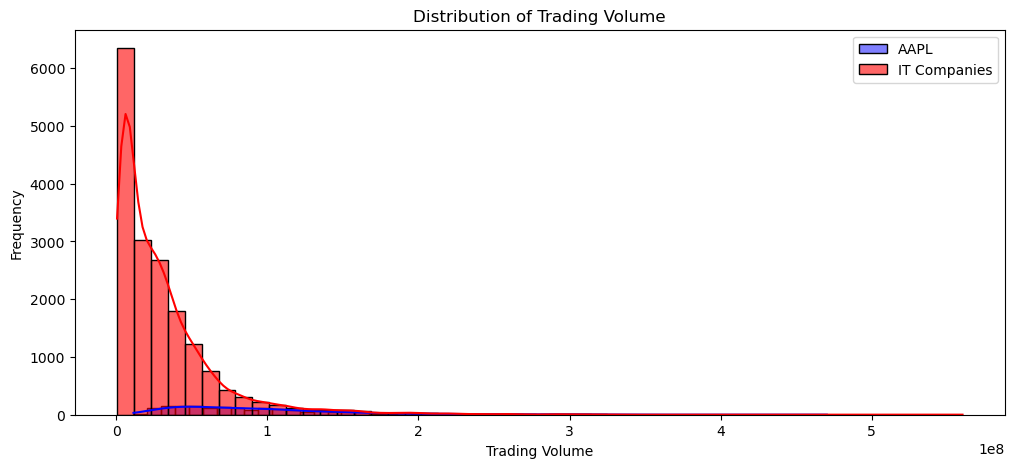

In [13]:
# Price Distribution
plt.figure(figsize=(12, 5))
sns.histplot(model_1_data['close'], bins=50, label='AAPL', kde=True, color='blue')
sns.histplot(model_2_data['close'], bins=50, label='IT Companies', kde=True, color='red', alpha=0.6)
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.legend()
plt.show()

# Volume Distribution
plt.figure(figsize=(12, 5))
sns.histplot(model_1_data['volume'], bins=50, label='AAPL', kde=True, color='blue')
sns.histplot(model_2_data['volume'], bins=50, label='IT Companies', kde=True, color='red', alpha=0.6)
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Trading Volume")
plt.legend()
plt.show()

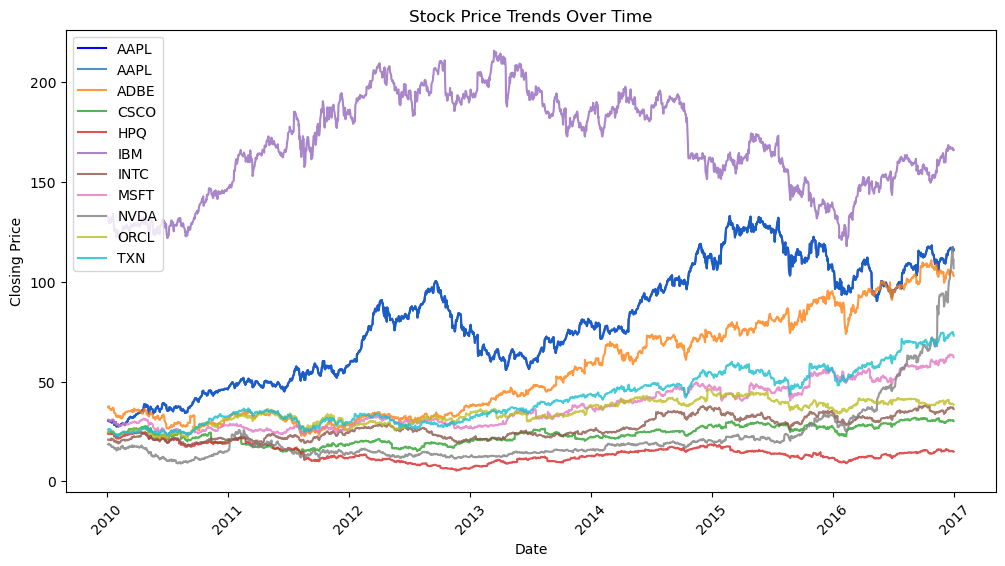

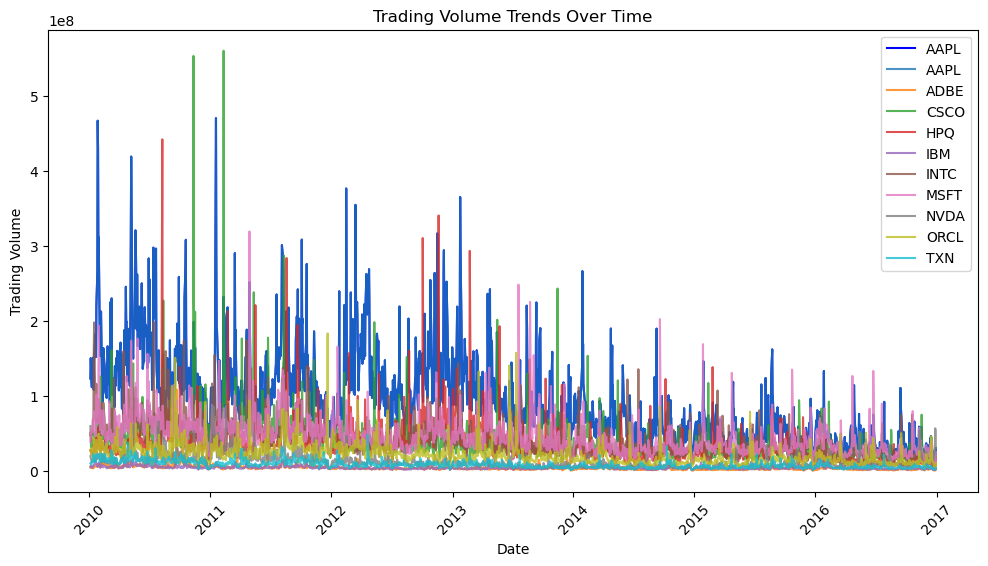

In [9]:
# Time-Series Plot of Closing Prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=model_1_data['date'], y=model_1_data['close'], label='AAPL', color='blue')
sns.lineplot(data=model_2_data, x='date', y='close', hue='symbol', alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Time-Series Plot of Trading Volume
plt.figure(figsize=(12, 6))
sns.lineplot(x=model_1_data['date'], y=model_1_data['volume'], label='AAPL', color='blue')
sns.lineplot(data=model_2_data, x='date', y='volume', hue='symbol', alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Trading Volume Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

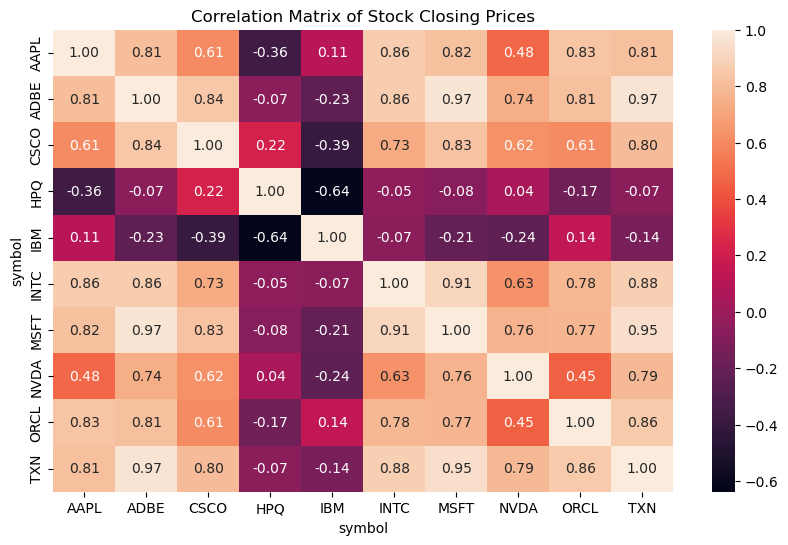

In [11]:
# Correlation Matrix and Headtmap
pivot_data = model_2_data.pivot(index='date', columns='symbol', values='close')
correlation_matrix = pivot_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Stock Closing Prices")
plt.show()